<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio de Feature Scaling

Continuando con nuestro proyecto en AutoRenew, la empresa de coches de segunda mano, en este laboratorio abordarás una fase crucial del preprocesamiento de datos: el **Feature Scaling**. Este paso es esencial para asegurar que todas las características (variables) de los coches se encuentren en la misma escala antes de entrenar los modelos de Machine Learning. Esto evitará que algunas características dominen sobre otras debido a sus rangos de valores diferentes, mejorando así la precisión del modelo predictivo que estás desarrollando.

Tu tarea en este laboratorio es aplicar técnicas de Feature Scaling a las características del conjunto de datos que consideres relevantes. Este paso es fundamental para preparar los datos de manera adecuada para el entrenamiento de modelos de Machine Learning, lo que haremos en los próximos ejercicios.

**Columnas del conjunto de datos que podrías escalar:**

- **price**: Precio del coche.

- **powerCV**: Potencia del coche en caballos de vapor (CV).

- **kilometer**: Kilometraje total del coche.

- **yearOfRegistration**: Año de registro del coche (aunque es una característica temporal, en algunos casos puede necesitar escalado dependiendo del enfoque del modelo).

- **monthOfRegistration**: Mes de registro del coche.

**Instrucciones:**

1. **Identificación de las características a escalar:** Revisa el conjunto de datos y selecciona las columnas que deberían ser escaladas. Estas generalmente incluyen características numéricas continuas como el precio, la potencia y el kilometraje.

2. **Aplicación de técnicas de Feature Scaling**


3. **Comparación de resultados:** Después de aplicar el escalado, observa cómo han cambiado las distribuciones de las características. Evalúa cuál de las técnicas de escalado es más apropiada para este conjunto de datos y justifica tu elección.

**Nota:** Este laboratorio se construye sobre el análisis exploratorio y la gestión de nulos que realizaste anteriormente. Asegúrate de mantener una buena documentación de tus procesos, ya que utilizaremos estos datos escalados en las próximas etapas de modelado de Machine Learning.


In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

import os
import sys 
sys.path.append(os.path.abspath("../src"))   
import soporte_preprocesamiento as f
import warnings
warnings.filterwarnings("ignore")


from datetime import datetime

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler

In [ ]:
df_vehiculos=pd.read_csv("..\datos2\datos_sin_nulos.csv", index_col=0).reset_index(drop=True)

Las distribuciones originales de Precio, Power CV, Kilometer, yearOfRegistration y monthOfRegistration

In [3]:
escalador_robust = RobustScaler()
datos_transf_robust = escalador_robust.fit_transform(df_vehiculos[["powerCV","kilometer"]])
df_vehiculos[["powerCV_robust","kilometer_robust"]] = datos_transf_robust


escalador_min_max = MinMaxScaler()
datos_transf_min_max = escalador_min_max.fit_transform(df_vehiculos[["powerCV","kilometer"]])
df_vehiculos[["powerCV_MinMax","kilometer_MinMax"]] = datos_transf_min_max




escalador_norm = Normalizer()
datos_transf_norm = escalador_norm.fit_transform(df_vehiculos[["powerCV","kilometer"]])
df_vehiculos[["powerCV_norm","kilometer_norm"]] = datos_transf_norm



escalador_est = StandardScaler()
datos_transf_est = escalador_est.fit_transform(df_vehiculos[["powerCV","kilometer"]])
df_vehiculos[["powerCV_est", "kilometer_est"]] = datos_transf_est

df_vehiculos.describe().T

,count,mean,std,min,25%,50%,75%,max
price,354691.0,5.359193e+03,5999.952254,55.000000,1250.000000,3000.000000,7200.000000,34999.000000
powerCV,354691.0,1.210242e+02,50.668004,10.000000,85.000000,120.000000,143.000000,349.000000
kilometer,354691.0,1.265437e+05,38927.349225,5000.000000,125000.000000,150000.000000,150000.000000,150000.000000
yearCreated,354691.0,2.016000e+03,0.009348,2014.000000,2016.000000,2016.000000,2016.000000,2016.000000
monthCreated,354691.0,3.160912e+00,0.377547,1.000000,3.000000,3.000000,3.000000,12.000000
powerCV_robust,354691.0,1.765789e-02,0.873586,-1.896552,-0.603448,0.000000,0.396552,3.948276
kilometer_robust,354691.0,-9.382539e-01,1.557094,-5.800000,-1.000000,0.000000,0.000000,0.000000
powerCV_MinMax,354691.0,3.275049e-01,0.149463,0.000000,0.221239,0.324484,0.392330,1.000000
kilometer_MinMax,354691.0,8.382321e-01,0.268464,0.000000,0.827586,1.000000,1.000000,1.000000
powerCV_norm,354691.0,1.496985e-03,0.003080,0.000067,0.000667,0.000860,0.001260,0.068836


Boxplots (Outliers) y distribuciones

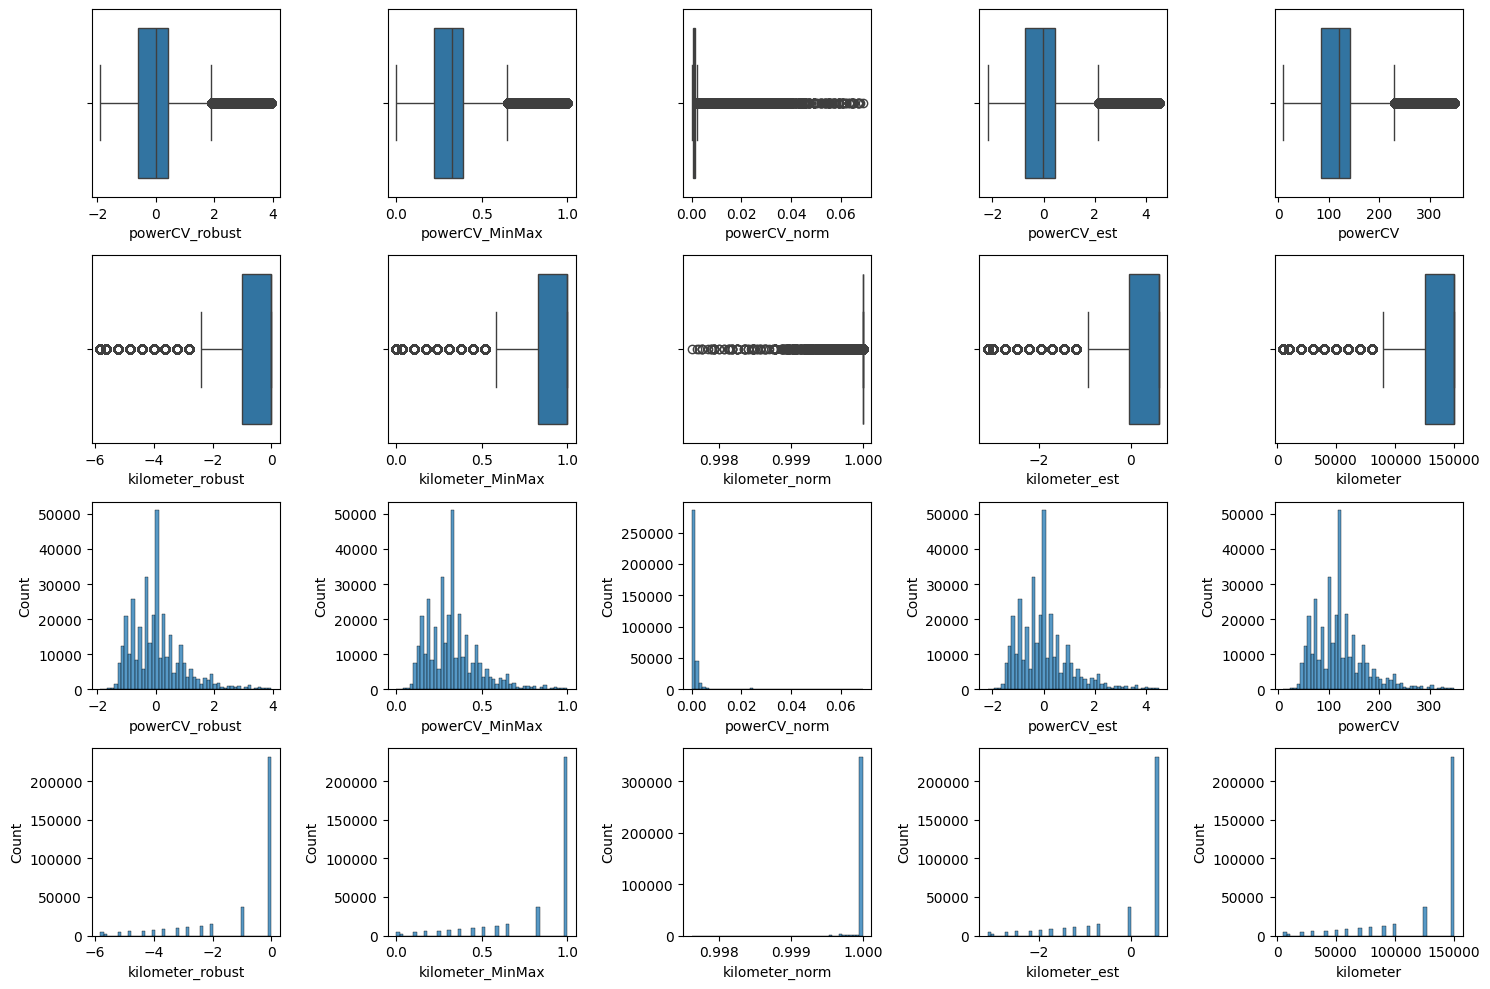

In [4]:
fig , axes = plt.subplots(nrows=4 , ncols=5, figsize = (15, 10) )


sns.boxplot(x = "powerCV_robust", data = df_vehiculos, ax = axes[0][0])
sns.boxplot(x = "powerCV_MinMax", data = df_vehiculos, ax = axes[0][1])
sns.boxplot(x = "powerCV_norm", data = df_vehiculos, ax = axes[0][2])
sns.boxplot(x = "powerCV_est", data = df_vehiculos, ax = axes[0][3])
sns.boxplot(x = "powerCV", data = df_vehiculos, ax = axes[0][4])


sns.boxplot(x = "kilometer_robust", data = df_vehiculos, ax = axes[1][0])
sns.boxplot(x = "kilometer_MinMax", data = df_vehiculos, ax = axes[1][1])
sns.boxplot(x = "kilometer_norm", data = df_vehiculos, ax = axes[1][2])
sns.boxplot(x = "kilometer_est", data = df_vehiculos, ax = axes[1][3])
sns.boxplot(x = "kilometer", data = df_vehiculos, ax = axes[1][4])



sns.histplot(x = "powerCV_robust", data = df_vehiculos, ax = axes[2][0],bins=50)
sns.histplot(x = "powerCV_MinMax", data = df_vehiculos, ax = axes[2][1],bins=50)
sns.histplot(x = "powerCV_norm", data = df_vehiculos, ax = axes[2][2],bins=50)
sns.histplot(x = "powerCV_est", data = df_vehiculos, ax = axes[2][3],bins=50)
sns.histplot(x = "powerCV", data = df_vehiculos, ax = axes[2][4],bins=50)


sns.histplot(x = "kilometer_robust", data = df_vehiculos, ax = axes[3][0],bins=50)
sns.histplot(x = "kilometer_MinMax", data = df_vehiculos, ax = axes[3][1],bins=50)
sns.histplot(x = "kilometer_norm", data = df_vehiculos, ax = axes[3][2],bins=50)
sns.histplot(x = "kilometer_est", data = df_vehiculos, ax = axes[3][3],bins=50)
sns.histplot(x = "kilometer", data = df_vehiculos, ax = axes[3][4],bins=50)

plt.tight_layout()


Dado que en el proceso de limpieza y exploración se observaron y se seleccionaron los límites de lo que se consideraría outlier y lo que se considera datos erróneos, los outliers que nos aparecen aquí son datos reales con lo que si que me interesa mantenerlos.  
Es por ello que tras descartar el método de normalizar y el de escalado min y max. Tuve que elegir entre la metodología robusta y la estándar.  
Finalmente, me decanto por la robusta ya que le da más importancia a dichos outliers que ya hemos comprobado que son datos viables y coherentes.

*Entrando un poco más en detalle:*  
Los kilómetros no contaban con una cantidad ingente de outliers a diferencia de la potencia que contaba con una proporción muy alta.  
Es por ello que al comparar las distribuciones tanto entre métodos como con la variable original, tanto el robusto como el estandarizado se parecen tanto.  
  
Además, tienen sentido las distribuciones ya que al ser una tienda de coches usados, los kilómetros tienen sentido que se agrupen en los valores más altos al igual que tiene sentido que la potencia se agrupe en valores más bajos ya que no son habituales los coches con una potencia superior a 400.

In [5]:
df_vehiculos.columns

Index(['dateCrawled', 'seller', 'offerType', 'price', 'abtest', 'vehicleType',
       'yearOfRegistration', 'gearbox', 'powerCV', 'model', 'kilometer',
       'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage',
       'lastSeen', 'yearCreated', 'monthCreated', 'powerCV_robust',
       'kilometer_robust', 'powerCV_MinMax', 'kilometer_MinMax',
       'powerCV_norm', 'kilometer_norm', 'powerCV_est', 'kilometer_est'],
      dtype='object')

In [6]:
lista_eliminar=['powerCV', 'kilometer', 'powerCV_MinMax', 'kilometer_MinMax',
       'powerCV_norm', 'kilometer_norm', 'powerCV_robust', 'kilometer_robust']

In [7]:
df_vehiculos.drop(columns=lista_eliminar, inplace=True)

In [ ]:
df_vehiculos.to_csv("..\datos2\datos_con_estandar.csv")